In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import re
import json
from matplotlib.legend_handler import HandlerLine2D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

In [35]:
#dev result path
pathcongater = "/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/IRDebias/coderdebiasinf/results/dev/"

### Interpolation model
Interpolation between debiasing adapter and task adapter in the last layer and in all layers.

In [36]:
#take the last step instead of best
dfinterpolation = pd.read_excel(os.path.join(pathcongater,"interpolate_server", "Interpolate_records_dev.xls"), sheet_name="records", usecols=['Timestamp', 'w', 'Best MRR@10', 'Best NFaiRR_cutoff_10', 'Best Recall@10','Best nDCG@10'], convert_float= False)
#dfinterpolation = dfinterpolation.sort_values("w")


#read interpolation experiments
config_lst = []
config_par = 'interpolate_position'
for dir in os.listdir(os.path.join(pathcongater,"interpolate_server")):
    if "interpolate" in dir:
        experiment_timestamp = re.search(r'(\d+-\d+-\d+_\d+-\d+-\d+)',dir).group(1)
        df_conf = json.load(open(os.path.join(pathcongater,"interpolate_server",dir, "configuration.json")))
        config_lst.append([experiment_timestamp, df_conf[config_par]])
config_df = pd.DataFrame(config_lst, columns=["experiment", config_par])
dfinterpolation = dfinterpolation.merge(config_df, left_on="Timestamp", right_on="experiment")
dfinterpolation.to_csv(os.path.join(pathcongater,"interpolate_server",'Interpolate_records_dev.csv'))
dfinterpolation

,Timestamp,w,Best MRR@10,Best Recall@10,Best nDCG@10,Best NFaiRR_cutoff_10,experiment,interpolate_position
0,2023-10-14_14-03-14,0.000,0.233,0.429,0.310,0.899,2023-10-14_14-03-14,all
1,2023-10-14_14-03-14,0.100,0.239,0.425,0.313,0.899,2023-10-14_14-03-14,all
2,2023-10-14_14-03-14,0.200,0.231,0.425,0.310,0.899,2023-10-14_14-03-14,all
3,2023-10-14_14-03-14,0.300,0.221,0.422,0.306,0.900,2023-10-14_14-03-14,all
4,2023-10-14_14-03-14,0.400,0.208,0.390,0.290,0.904,2023-10-14_14-03-14,all
...,...,...,...,...,...,...,...,...
79,2023-10-14_14-21-05,0.900,0.156,0.336,0.222,0.934,2023-10-14_14-21-05,last
80,2023-10-14_14-21-05,0.930,0.133,0.302,0.193,0.938,2023-10-14_14-21-05,last
81,2023-10-14_14-21-05,0.950,0.106,0.253,0.161,0.943,2023-10-14_14-21-05,last
82,2023-10-14_14-21-05,0.970,0.082,0.216,0.126,0.949,2023-10-14_14-21-05,last


In [37]:
dfinterpolation_summary = dfinterpolation.groupby(["interpolate_position","w"],as_index=False).agg(
    MRRMean=('Best MRR@10', np.mean),
    MRRStd=('Best MRR@10', np.std),
    RecallMean=('Best Recall@10', np.mean),
    RecallStd=('Best Recall@10', np.std),
    nDCGMean=('Best nDCG@10', np.mean),
    nDCGStd=('Best nDCG@10', np.std),
    NFairrMean=('Best NFaiRR_cutoff_10', np.mean),
    NFairrStd=('Best NFaiRR_cutoff_10', np.std),
    Count=('Best MRR@10', 'count'))
dfinterpolation_summary['Model'] = 'Interpolate'
dfinterpolation_summary

,interpolate_position,w,MRRMean,MRRStd,RecallMean,RecallStd,nDCGMean,nDCGStd,NFairrMean,NFairrStd,Count,Model
0,all,0.000,0.231,0.003,0.437,0.007,0.311,0.003,0.899,0.002,3,Interpolate
1,all,0.100,0.233,0.005,0.437,0.014,0.318,0.004,0.899,0.001,3,Interpolate
2,all,0.200,0.230,0.002,0.428,0.007,0.312,0.002,0.899,0.001,3,Interpolate
3,all,0.300,0.224,0.004,0.424,0.005,0.306,0.002,0.898,0.006,3,Interpolate
4,all,0.400,0.215,0.006,0.413,0.020,0.297,0.006,0.900,0.007,3,Interpolate
5,all,0.500,0.197,0.004,0.388,0.002,0.277,0.003,0.903,0.008,3,Interpolate
6,all,0.600,0.170,0.003,0.346,0.006,0.249,0.005,0.905,0.010,3,Interpolate
7,all,0.700,0.144,0.009,0.318,0.007,0.215,0.009,0.915,0.013,3,Interpolate
8,all,0.800,0.110,0.005,0.279,0.021,0.176,0.007,0.927,0.011,3,Interpolate
9,all,0.900,0.072,0.002,0.206,0.003,0.120,0.002,0.943,0.007,3,Interpolate


In [38]:
with pd.option_context('display.precision', 3):
    print(dfinterpolation_summary)

   interpolate_position     w  MRRMean  MRRStd  RecallMean  RecallStd  \
0                   all 0.000    0.231   0.003       0.437      0.007   
1                   all 0.100    0.233   0.005       0.437      0.014   
2                   all 0.200    0.230   0.002       0.428      0.007   
3                   all 0.300    0.224   0.004       0.424      0.005   
4                   all 0.400    0.215   0.006       0.413      0.020   
5                   all 0.500    0.197   0.004       0.388      0.002   
6                   all 0.600    0.170   0.003       0.346      0.006   
7                   all 0.700    0.144   0.009       0.318      0.007   
8                   all 0.800    0.110   0.005       0.279      0.021   
9                   all 0.900    0.072   0.002       0.206      0.003   
10                  all 0.930    0.058   0.003       0.181      0.008   
11                  all 0.950    0.048   0.001       0.160      0.005   
12                  all 0.970    0.037   0.002     

### Congater results

In [39]:
dfcongater = pd.read_excel(os.path.join(pathcongater, "Congater_dev_numlayers2_records_dev.xls"), sheet_name="records", usecols=['Timestamp', 'w', 'Best MRR@10', 'Best NFaiRR_cutoff_10','Best Recall@10','Best nDCG@10'], convert_float= False)
dfcongater = dfcongater.sort_values("w")
dfcongater_summary = dfcongater.groupby(["w"],as_index=False).agg(
    MRRMean=('Best MRR@10', np.mean),
    MRRStd=('Best MRR@10', np.std),
    RecallMean=('Best Recall@10', np.mean),
    RecallStd=('Best Recall@10', np.std),
    nDCGMean=('Best nDCG@10', np.mean),
    nDCGStd=('Best nDCG@10', np.std),
    NFairrMean=('Best NFaiRR_cutoff_10', np.mean),
    NFairrStd=('Best NFaiRR_cutoff_10', np.std),
    Count=('Best MRR@10', 'count'))
dfcongater_summary['Model'] = 'Congater'
dfcongater_summary

,w,MRRMean,MRRStd,RecallMean,RecallStd,nDCGMean,nDCGStd,NFairrMean,NFairrStd,Count,Model
0,0.000,0.235,0.004,0.450,0.004,0.317,0.003,0.904,0.001,3,Congater
1,0.100,0.235,0.002,0.446,0.006,0.315,0.004,0.906,0.001,3,Congater
2,0.200,0.232,0.001,0.440,0.004,0.313,0.004,0.908,0.001,3,Congater
3,0.300,0.228,0.004,0.434,0.008,0.311,0.004,0.913,0.001,3,Congater
4,0.400,0.227,0.003,0.430,0.009,0.308,0.004,0.918,0.001,3,Congater
5,0.500,0.223,0.004,0.423,0.007,0.301,0.005,0.923,0.001,3,Congater
6,0.600,0.213,0.005,0.417,0.010,0.296,0.006,0.929,0.001,3,Congater
7,0.700,0.209,0.004,0.410,0.003,0.292,0.003,0.936,0.001,3,Congater
8,0.800,0.209,0.002,0.393,0.005,0.282,0.001,0.942,0.000,3,Congater
9,0.900,0.202,0.002,0.387,0.001,0.270,0.003,0.952,0.000,3,Congater


In [40]:
# with pd.option_context('display.precision',8):
#     print(dfcongater_summary)

### Adapter results

In [41]:
#read adapter experiments
df_adapter = pd.DataFrame()
for dir in os.listdir(os.path.join(pathcongater, "adapter")):
    if "xls" in dir:
        print(dir)
        df = pd.read_excel(os.path.join(pathcongater, "adapter", dir), sheet_name="records", usecols=['Timestamp', 'w', 'Best MRR@10', 'Best NFaiRR_cutoff_10','Best Recall@10','Best nDCG@10'], convert_float= False)
        df["file_name"] = dir
        df_adapter = pd.concat([df_adapter,df])
df_adapter

adapter_bias_regul_coeff=10_dev.xls
adapter_bias_regul_coeff=15_dev.xls
adapter_bias_regul_coeff=1_dev.xls
adapter_bias_regul_coeff=2_dev.xls
adapter_bias_regul_coeff=5_dev.xls
adapter_debias_dev.xls
adapter_task_dev.xls


,Timestamp,w,Best MRR@10,Best Recall@10,Best nDCG@10,Best NFaiRR_cutoff_10,file_name
0,2023-09-16_11-12-30,NaN,0.082,0.221,0.135,0.948,adapter_bias_regul_coeff=10_dev.xls
1,2023-09-21_17-15-42,NaN,0.082,0.212,0.132,0.951,adapter_bias_regul_coeff=10_dev.xls
2,2023-09-21_17-21-13,NaN,0.082,0.198,0.124,0.949,adapter_bias_regul_coeff=10_dev.xls
0,2023-09-17_12-39-02,NaN,0.046,0.140,0.083,0.959,adapter_bias_regul_coeff=15_dev.xls
1,2023-09-21_17-36-09,NaN,0.049,0.158,0.088,0.958,adapter_bias_regul_coeff=15_dev.xls
2,2023-09-21_17-36-59,NaN,0.050,0.158,0.092,0.957,adapter_bias_regul_coeff=15_dev.xls
0,2023-09-16_11-00-31,NaN,0.226,0.434,0.303,0.911,adapter_bias_regul_coeff=1_dev.xls
1,2023-09-20_17-00-11,NaN,0.219,0.425,0.297,0.909,adapter_bias_regul_coeff=1_dev.xls
2,2023-09-20_17-07-04,NaN,0.230,0.439,0.307,0.909,adapter_bias_regul_coeff=1_dev.xls
0,2023-09-16_11-05-09,NaN,0.206,0.418,0.287,0.925,adapter_bias_regul_coeff=2_dev.xls


In [42]:
#read configs
config_lst = []
config_par = 'load_model_path'
for dir in os.listdir(os.path.join(pathcongater, "adapter")):
    if "adapter" in dir and 'xls' not in dir:
        experiment_timestamp = re.search(r'(\d+-\d+-\d+_\d+-\d+-\d+)',dir).group(1)
        df_conf = json.load(open(os.path.join(pathcongater,"adapter",dir, "configuration.json")))
        experiment_name = re.search(r'(\d+-\d+-\d+_\d+-\d+-\d+_.{3})',df_conf[config_par]).group(1)
        config_lst.append([experiment_timestamp, experiment_name])
config_df = pd.DataFrame(config_lst, columns=["experiment", config_par])

In [43]:
#train result path
pathtrain = "/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/IRDebias/coderdebiasinf/results/adapter/"
config_lst = []
config_par = 'bias_regul_coeff'
for dir in os.listdir(pathtrain):
    if "adapter" in dir and 'xls' not in dir:
        experiment_name = re.search(r'(\d+-\d+-\d+_\d+-\d+-\d+_.{3})',dir).group(1)
        df_conf = json.load(open(os.path.join(pathtrain,dir, "configuration.json")))
        config_lst.append([experiment_name, df_conf[config_par]])
config_df_train = pd.DataFrame(config_lst, columns=["experiment", config_par])

In [44]:
df_adapter = config_df_train.merge(config_df, left_on="experiment", right_on="load_model_path")[['experiment_y', 'bias_regul_coeff']].merge(df_adapter, left_on='experiment_y',right_on='Timestamp')[['Timestamp', 'bias_regul_coeff','Best MRR@10','Best Recall@10', 'Best NFaiRR_cutoff_10','Best nDCG@10']]

In [45]:
df_adapter.sort_values("bias_regul_coeff").to_csv(os.path.join(pathcongater,'Adapter_records_dev.csv'))
df_adapter

,Timestamp,bias_regul_coeff,Best MRR@10,Best Recall@10,Best NFaiRR_cutoff_10,Best nDCG@10
0,2023-09-12_20-07-11,0,0.231,0.439,0.900,0.315
1,2023-09-12_20-12-26,20,0.027,0.105,0.967,0.053
2,2023-09-16_11-00-31,1,0.226,0.434,0.911,0.303
3,2023-09-16_11-05-09,2,0.206,0.418,0.925,0.287
4,2023-09-16_11-09-22,5,0.149,0.311,0.934,0.213
5,2023-09-16_11-12-30,10,0.082,0.221,0.948,0.135
6,2023-09-17_12-39-02,15,0.046,0.140,0.959,0.083
7,2023-09-17_12-42-20,20,0.022,0.100,0.965,0.048
8,2023-09-17_12-44-27,20,0.023,0.100,0.964,0.049
9,2023-09-17_12-34-23,0,0.228,0.443,0.897,0.309


In [46]:
df_adapter_summary = df_adapter.groupby('bias_regul_coeff',as_index=False).agg(
                MRRMean=('Best MRR@10', np.mean),
                MRRStd=('Best MRR@10', np.std),
                RecallMean=('Best Recall@10', np.mean),
                RecallStd=('Best Recall@10', np.std),
                nDCGMean=('Best nDCG@10', np.mean),
                nDCGStd=('Best nDCG@10', np.std),
                NFairrMean=('Best NFaiRR_cutoff_10', np.mean),
                NFairrStd=('Best NFaiRR_cutoff_10', np.std),
                Count=('Best MRR@10', 'count'))
df_adapter_summary['Model'] = 'Adapter'
df_adapter_summary

,bias_regul_coeff,MRRMean,MRRStd,RecallMean,RecallStd,nDCGMean,nDCGStd,NFairrMean,NFairrStd,Count,Model
0,0,0.231,0.003,0.437,0.007,0.311,0.003,0.899,0.002,3,Adapter
1,1,0.225,0.006,0.433,0.007,0.302,0.005,0.910,0.001,3,Adapter
2,2,0.203,0.004,0.415,0.012,0.285,0.007,0.921,0.003,3,Adapter
3,5,0.147,0.003,0.308,0.008,0.211,0.001,0.933,0.000,3,Adapter
4,10,0.082,0.000,0.210,0.012,0.130,0.006,0.949,0.002,3,Adapter
5,15,0.048,0.002,0.152,0.011,0.088,0.005,0.958,0.001,3,Adapter
6,20,0.024,0.003,0.102,0.003,0.050,0.002,0.965,0.002,3,Adapter


In [47]:
#write out the results
pd.concat([dfcongater_summary,dfinterpolation_summary]).to_csv(os.path.join(pathcongater,'res.csv'))
pd.concat([df_adapter_summary]).to_csv(os.path.join(pathcongater,'res_adapter.csv'))

### FT results

In [48]:
#read adapter experiments
path_coder = "/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/IRDebias/GithubRepos/coder/Experiments/dev/"
df_ft = pd.DataFrame()
for dir in os.listdir(os.path.join(path_coder)):
    if "xls" in dir:
        print(dir)
        df = pd.read_excel(os.path.join(path_coder, dir), sheet_name="records", usecols=['Timestamp', 'Best MRR@10', 'Best NFaiRR_cutoff_10','Best Recall@10','Best nDCG@10'], convert_float= False)
        df["file_name"] = dir
        df_ft = pd.concat([df_ft,df])
df_ft

FT_bias_regul_coeff=10_dev.xls
FT_bias_regul_coeff=15_dev.xls
FT_bias_regul_coeff=1_dev.xls
FT_bias_regul_coeff=20_dev.xls
FT_bias_regul_coeff=2_dev.xls
FT_bias_regul_coeff=5_dev.xls
FT_task_dev.xls


,Timestamp,Best MRR@10,Best Recall@10,Best nDCG@10,Best NFaiRR_cutoff_10,file_name
0,2023-10-13_16-55-32,0.144,0.318,0.211,0.954,FT_bias_regul_coeff=10_dev.xls
1,2023-10-14_11-18-48,0.140,0.319,0.207,0.956,FT_bias_regul_coeff=10_dev.xls
2,2023-10-15_11-25-32,0.143,0.313,0.204,0.956,FT_bias_regul_coeff=10_dev.xls
0,2023-10-13_16-58-56,0.107,0.241,0.161,0.968,FT_bias_regul_coeff=15_dev.xls
1,2023-10-14_11-14-29,0.115,0.249,0.166,0.964,FT_bias_regul_coeff=15_dev.xls
2,2023-10-15_11-24-12,0.105,0.232,0.158,0.963,FT_bias_regul_coeff=15_dev.xls
0,2023-10-13_16-43-04,0.229,0.448,0.311,0.914,FT_bias_regul_coeff=1_dev.xls
1,2023-10-13_16-45-00,0.221,0.446,0.305,0.915,FT_bias_regul_coeff=1_dev.xls
2,2023-10-14_11-27-55,0.222,0.443,0.307,0.915,FT_bias_regul_coeff=1_dev.xls
0,2023-10-13_17-08-17,0.076,0.206,0.123,0.972,FT_bias_regul_coeff=20_dev.xls


In [49]:
#read configs
config_lst = []
config_par = 'load_model_path'
for dir in os.listdir(os.path.join(path_coder)):
    if "FT" in dir and 'xls' not in dir:
        experiment_timestamp = re.search(r'(\d+-\d+-\d+_\d+-\d+-\d+)',dir).group(1)
        df_conf = json.load(open(os.path.join(path_coder,dir, "configuration.json")))
        experiment_name = re.search(r'(\d+-\d+-\d+_\d+-\d+-\d+_.{3})',df_conf[config_par]).group(1)
        config_lst.append([experiment_timestamp, experiment_name])
config_df = pd.DataFrame(config_lst, columns=["experiment", config_par])
config_df

,experiment,load_model_path
0,2023-10-13_16-55-32,2023-05-06_11-01-45_0Li
1,2023-10-14_11-18-48,2023-10-13_15-39-57_kr0
2,2023-10-15_11-25-32,2023-10-14_11-43-13_4oE
3,2023-10-13_16-58-56,2023-05-10_08-48-15_ikF
4,2023-10-14_11-14-29,2023-10-13_15-41-25_W0N
5,2023-10-15_11-24-12,2023-10-14_11-44-18_wTK
6,2023-10-13_16-43-04,2023-05-10_09-03-17_41U
7,2023-10-13_16-45-00,2023-10-12_17-25-54_L6o
8,2023-10-14_11-27-55,2023-10-13_17-18-23_ESo
9,2023-10-13_17-08-17,2023-05-14_18-34-04_3Il


In [50]:
#train result path
pathtrain = "/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/IRDebias/GithubRepos/coder/Experiments/CV_Server/"
config_lst = []
config_par = 'bias_regul_coeff'
for dir in os.listdir(pathtrain):
    if "CV_Anserini" in dir and 'xls' not in dir:
        experiment_name = re.search(r'(\d+-\d+-\d+_\d+-\d+-\d+_.{3})',dir).group(1)
        df_conf = json.load(open(os.path.join(pathtrain,dir, "configuration.json")))
        config_lst.append([experiment_name, df_conf[config_par]])
config_df_train = pd.DataFrame(config_lst, columns=["experiment", config_par])
config_df_train

,experiment,bias_regul_coeff
0,2023-05-05_22-28-55_HCX,0
1,2023-05-06_11-01-45_0Li,10
2,2023-05-07_10-53-33_H07,5
3,2023-05-07_11-07-56_WlQ,2
4,2023-05-10_08-48-15_ikF,15
5,2023-05-10_09-03-17_41U,1
6,2023-05-14_18-34-04_3Il,20
7,2023-10-12_17-25-54_L6o,1
8,2023-10-12_17-26-14_4jM,0
9,2023-10-13_14-35-27_iPx,2


In [51]:
df_FT = config_df_train.merge(config_df, left_on="experiment", right_on="load_model_path")[['experiment_y', 'bias_regul_coeff']].merge(df_ft, left_on='experiment_y',right_on='Timestamp')[['Timestamp', 'bias_regul_coeff','Best MRR@10', 'Best NFaiRR_cutoff_10','Best Recall@10','Best nDCG@10']]
df_FT

,Timestamp,bias_regul_coeff,Best MRR@10,Best NFaiRR_cutoff_10,Best Recall@10,Best nDCG@10
0,2023-10-13_16-31-08,0,0.236,0.905,0.447,0.317
1,2023-10-13_16-55-32,10,0.144,0.954,0.318,0.211
2,2023-10-13_16-51-16,5,0.181,0.946,0.396,0.263
3,2023-10-13_16-48-43,2,0.225,0.921,0.427,0.302
4,2023-10-13_16-58-56,15,0.107,0.968,0.241,0.161
5,2023-10-13_16-43-04,1,0.229,0.914,0.448,0.311
6,2023-10-13_17-08-17,20,0.076,0.972,0.206,0.123
7,2023-10-13_16-45-00,1,0.221,0.915,0.446,0.305
8,2023-10-13_16-35-24,0,0.235,0.903,0.448,0.316
9,2023-10-14_11-22-31,2,0.217,0.921,0.441,0.301


In [52]:
df_ft_summary = df_FT.groupby('bias_regul_coeff',as_index=False).agg(
                MRRMean=('Best MRR@10', np.mean),
                MRRStd=('Best MRR@10', np.std),
                RecallMean=('Best Recall@10', np.mean),
                RecallStd=('Best Recall@10', np.std),
                nDCGMean=('Best nDCG@10', np.mean),
                nDCGStd=('Best nDCG@10', np.std),
                NFairrMean=('Best NFaiRR_cutoff_10', np.mean),
                NFairrStd=('Best NFaiRR_cutoff_10', np.std),
                Count=('Best MRR@10', 'count'))
df_ft_summary['Model'] = 'FT'
df_ft_summary

,bias_regul_coeff,MRRMean,MRRStd,RecallMean,RecallStd,nDCGMean,nDCGStd,NFairrMean,NFairrStd,Count,Model
0,0,0.234,0.002,0.446,0.002,0.314,0.004,0.904,0.001,3,FT
1,1,0.224,0.004,0.446,0.002,0.307,0.003,0.915,0.001,3,FT
2,2,0.218,0.006,0.429,0.011,0.299,0.005,0.921,0.000,3,FT
3,5,0.183,0.003,0.391,0.005,0.262,0.001,0.943,0.002,3,FT
4,10,0.142,0.002,0.317,0.003,0.207,0.003,0.955,0.001,3,FT
5,15,0.109,0.005,0.241,0.009,0.162,0.004,0.965,0.002,3,FT
6,20,0.079,0.003,0.209,0.002,0.125,0.002,0.972,0.000,3,FT


In [53]:
#with pd.option_context('display.precision', 3):
pd.options.display.float_format = "{:,.3f}".format
print(df_ft_summary[['bias_regul_coeff', 'MRRMean','MRRStd', 'NFairrMean','NFairrStd','RecallMean', 'RecallStd', 'nDCGMean', 'nDCGStd']].to_latex(index = False))

\begin{tabular}{rrrrrrrrr}
\toprule
 bias\_regul\_coeff &  MRRMean &  MRRStd &  NFairrMean &  NFairrStd &  RecallMean &  RecallStd &  nDCGMean &  nDCGStd \\
\midrule
                0 &    0.234 &   0.002 &       0.904 &      0.001 &       0.446 &      0.002 &     0.314 &    0.004 \\
                1 &    0.224 &   0.004 &       0.915 &      0.001 &       0.446 &      0.002 &     0.307 &    0.003 \\
                2 &    0.218 &   0.006 &       0.921 &      0.000 &       0.429 &      0.011 &     0.299 &    0.005 \\
                5 &    0.183 &   0.003 &       0.943 &      0.002 &       0.391 &      0.005 &     0.262 &    0.001 \\
               10 &    0.142 &   0.002 &       0.955 &      0.001 &       0.317 &      0.003 &     0.207 &    0.003 \\
               15 &    0.109 &   0.005 &       0.965 &      0.002 &       0.241 &      0.009 &     0.162 &    0.004 \\
               20 &    0.079 &   0.003 &       0.972 &      0.000 &       0.209 &      0.002 &     0.125 &    0.002 \\
\

In [54]:
with pd.option_context('display.precision', 7):
    print(df_adapter_summary)

   bias_regul_coeff  MRRMean  MRRStd  RecallMean  RecallStd  nDCGMean  \
0                 0    0.231   0.003       0.437      0.007     0.311   
1                 1    0.225   0.006       0.433      0.007     0.302   
2                 2    0.203   0.004       0.415      0.012     0.285   
3                 5    0.147   0.003       0.308      0.008     0.211   
4                10    0.082   0.000       0.210      0.012     0.130   
5                15    0.048   0.002       0.152      0.011     0.088   
6                20    0.024   0.003       0.102      0.003     0.050   

   nDCGStd  NFairrMean  NFairrStd  Count    Model  
0    0.003       0.899      0.002      3  Adapter  
1    0.005       0.910      0.001      3  Adapter  
2    0.007       0.921      0.003      3  Adapter  
3    0.001       0.933      0.000      3  Adapter  
4    0.006       0.949      0.002      3  Adapter  
5    0.005       0.958      0.001      3  Adapter  
6    0.002       0.965      0.002      3  Adapter  

In [55]:
#with pd.option_context('display.precision', 3):
pd.options.display.float_format = "{:,.3f}".format
print(df_adapter_summary[['bias_regul_coeff', 'MRRMean','MRRStd', 'NFairrMean','NFairrStd','RecallMean', 'RecallStd', 'nDCGMean', 'nDCGStd']].to_latex(index = False))

\begin{tabular}{rrrrrrrrr}
\toprule
 bias\_regul\_coeff &  MRRMean &  MRRStd &  NFairrMean &  NFairrStd &  RecallMean &  RecallStd &  nDCGMean &  nDCGStd \\
\midrule
                0 &    0.231 &   0.003 &       0.899 &      0.002 &       0.437 &      0.007 &     0.311 &    0.003 \\
                1 &    0.225 &   0.006 &       0.910 &      0.001 &       0.433 &      0.007 &     0.302 &    0.005 \\
                2 &    0.203 &   0.004 &       0.921 &      0.003 &       0.415 &      0.012 &     0.285 &    0.007 \\
                5 &    0.147 &   0.003 &       0.933 &      0.000 &       0.308 &      0.008 &     0.211 &    0.001 \\
               10 &    0.082 &   0.000 &       0.949 &      0.002 &       0.210 &      0.012 &     0.130 &    0.006 \\
               15 &    0.048 &   0.002 &       0.958 &      0.001 &       0.152 &      0.011 &     0.088 &    0.005 \\
               20 &    0.024 &   0.003 &       0.965 &      0.002 &       0.102 &      0.003 &     0.050 &    0.002 \\
\

In [56]:
#compute differences in values
df_ft_adp_diff = df_ft_summary.merge(df_adapter_summary, on="bias_regul_coeff", how='inner', suffixes=('ft', 'adp'))
df_ft_adp_diff["DiffMRR"] = df_ft_adp_diff["MRRMeanft"] - df_ft_adp_diff["MRRMeanadp"]
df_ft_adp_diff["DiffNFairr"] = df_ft_adp_diff["NFairrMeanft"] - df_ft_adp_diff["NFairrMeanadp"]
df_ft_adp_diff

,bias_regul_coeff,MRRMeanft,MRRStdft,RecallMeanft,RecallStdft,nDCGMeanft,nDCGStdft,NFairrMeanft,NFairrStdft,Countft,...,RecallMeanadp,RecallStdadp,nDCGMeanadp,nDCGStdadp,NFairrMeanadp,NFairrStdadp,Countadp,Modeladp,DiffMRR,DiffNFairr
0,0,0.234,0.002,0.446,0.002,0.314,0.004,0.904,0.001,3,...,0.437,0.007,0.311,0.003,0.899,0.002,3,Adapter,0.003,0.005
1,1,0.224,0.004,0.446,0.002,0.307,0.003,0.915,0.001,3,...,0.433,0.007,0.302,0.005,0.910,0.001,3,Adapter,-0.001,0.005
2,2,0.218,0.006,0.429,0.011,0.299,0.005,0.921,0.000,3,...,0.415,0.012,0.285,0.007,0.921,0.003,3,Adapter,0.015,0.000
3,5,0.183,0.003,0.391,0.005,0.262,0.001,0.943,0.002,3,...,0.308,0.008,0.211,0.001,0.933,0.000,3,Adapter,0.036,0.010
4,10,0.142,0.002,0.317,0.003,0.207,0.003,0.955,0.001,3,...,0.210,0.012,0.130,0.006,0.949,0.002,3,Adapter,0.060,0.006
5,15,0.109,0.005,0.241,0.009,0.162,0.004,0.965,0.002,3,...,0.152,0.011,0.088,0.005,0.958,0.001,3,Adapter,0.061,0.007
6,20,0.079,0.003,0.209,0.002,0.125,0.002,0.972,0.000,3,...,0.102,0.003,0.050,0.002,0.965,0.002,3,Adapter,0.056,0.007


In [57]:
#with pd.option_context('display.precision', 3):
pd.options.display.float_format = "{:,.3f}".format
print(dfcongater_summary[['w', 'MRRMean','MRRStd', 'NFairrMean','NFairrStd', 'RecallMean', 'RecallStd', 'nDCGMean', 'nDCGStd']].to_latex(index = False))

\begin{tabular}{rrrrrrrrr}
\toprule
    w &  MRRMean &  MRRStd &  NFairrMean &  NFairrStd &  RecallMean &  RecallStd &  nDCGMean &  nDCGStd \\
\midrule
0.000 &    0.235 &   0.004 &       0.904 &      0.001 &       0.450 &      0.004 &     0.317 &    0.003 \\
0.100 &    0.235 &   0.002 &       0.906 &      0.001 &       0.446 &      0.006 &     0.315 &    0.004 \\
0.200 &    0.232 &   0.001 &       0.908 &      0.001 &       0.440 &      0.004 &     0.313 &    0.004 \\
0.300 &    0.228 &   0.004 &       0.913 &      0.001 &       0.434 &      0.008 &     0.311 &    0.004 \\
0.400 &    0.227 &   0.003 &       0.918 &      0.001 &       0.430 &      0.009 &     0.308 &    0.004 \\
0.500 &    0.223 &   0.004 &       0.923 &      0.001 &       0.423 &      0.007 &     0.301 &    0.005 \\
0.600 &    0.213 &   0.005 &       0.929 &      0.001 &       0.417 &      0.010 &     0.296 &    0.006 \\
0.700 &    0.209 &   0.004 &       0.936 &      0.001 &       0.410 &      0.003 &     0.292 &    0

In [58]:
#with pd.option_context('display.precision', 3):
pd.options.display.float_format = "{:,.3f}".format
print(dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'last'][['w', 'MRRMean','MRRStd', 'NFairrMean','NFairrStd','RecallMean', 'RecallStd', 'nDCGMean', 'nDCGStd']].to_latex(index = False))

\begin{tabular}{rrrrrrrrr}
\toprule
    w &  MRRMean &  MRRStd &  NFairrMean &  NFairrStd &  RecallMean &  RecallStd &  nDCGMean &  nDCGStd \\
\midrule
0.000 &    0.231 &   0.003 &       0.899 &      0.002 &       0.437 &      0.007 &     0.311 &    0.003 \\
0.100 &    0.231 &   0.002 &       0.900 &      0.001 &       0.440 &      0.005 &     0.313 &    0.003 \\
0.200 &    0.230 &   0.002 &       0.901 &      0.001 &       0.444 &      0.005 &     0.316 &    0.003 \\
0.300 &    0.229 &   0.002 &       0.902 &      0.001 &       0.447 &      0.005 &     0.318 &    0.004 \\
0.400 &    0.228 &   0.003 &       0.904 &      0.000 &       0.455 &      0.002 &     0.322 &    0.001 \\
0.500 &    0.225 &   0.002 &       0.906 &      0.001 &       0.457 &      0.001 &     0.319 &    0.001 \\
0.600 &    0.220 &   0.003 &       0.909 &      0.000 &       0.458 &      0.001 &     0.317 &    0.002 \\
0.700 &    0.210 &   0.005 &       0.913 &      0.000 &       0.447 &      0.004 &     0.306 &    0

In [59]:
#with pd.option_context('display.precision', 3):
pd.options.display.float_format = "{:,.3f}".format
print(dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'all'][['w', 'MRRMean','MRRStd', 'NFairrMean','NFairrStd','RecallMean', 'RecallStd', 'nDCGMean', 'nDCGStd']].to_latex(index = False))

\begin{tabular}{rrrrrrrrr}
\toprule
    w &  MRRMean &  MRRStd &  NFairrMean &  NFairrStd &  RecallMean &  RecallStd &  nDCGMean &  nDCGStd \\
\midrule
0.000 &    0.231 &   0.003 &       0.899 &      0.002 &       0.437 &      0.007 &     0.311 &    0.003 \\
0.100 &    0.233 &   0.005 &       0.899 &      0.001 &       0.437 &      0.014 &     0.318 &    0.004 \\
0.200 &    0.230 &   0.002 &       0.899 &      0.001 &       0.428 &      0.007 &     0.312 &    0.002 \\
0.300 &    0.224 &   0.004 &       0.898 &      0.006 &       0.424 &      0.005 &     0.306 &    0.002 \\
0.400 &    0.215 &   0.006 &       0.900 &      0.007 &       0.413 &      0.020 &     0.297 &    0.006 \\
0.500 &    0.197 &   0.004 &       0.903 &      0.008 &       0.388 &      0.002 &     0.277 &    0.003 \\
0.600 &    0.170 &   0.003 &       0.905 &      0.010 &       0.346 &      0.006 &     0.249 &    0.005 \\
0.700 &    0.144 &   0.009 &       0.915 &      0.013 &       0.318 &      0.007 &     0.215 &    0

In [60]:
#compute differences in values
df_con_int_diff = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'last'].merge(dfcongater_summary, on="w", how='inner', suffixes=('int', 'con'))
df_con_int_diff["DiffMRR"] = df_con_int_diff["MRRMeanint"] - df_con_int_diff["MRRMeancon"]
df_con_int_diff["DiffNFairr"] = df_con_int_diff["NFairrMeanint"] - df_con_int_diff["NFairrMeancon"]
df_con_int_diff

,interpolate_position,w,MRRMeanint,MRRStdint,RecallMeanint,RecallStdint,nDCGMeanint,nDCGStdint,NFairrMeanint,NFairrStdint,...,RecallMeancon,RecallStdcon,nDCGMeancon,nDCGStdcon,NFairrMeancon,NFairrStdcon,Countcon,Modelcon,DiffMRR,DiffNFairr
0,last,0.000,0.231,0.003,0.437,0.007,0.311,0.003,0.899,0.002,...,0.450,0.004,0.317,0.003,0.904,0.001,3,Congater,-0.004,-0.005
1,last,0.100,0.231,0.002,0.440,0.005,0.313,0.003,0.900,0.001,...,0.446,0.006,0.315,0.004,0.906,0.001,3,Congater,-0.004,-0.006
2,last,0.200,0.230,0.002,0.444,0.005,0.316,0.003,0.901,0.001,...,0.440,0.004,0.313,0.004,0.908,0.001,3,Congater,-0.002,-0.007
3,last,0.300,0.229,0.002,0.447,0.005,0.318,0.004,0.902,0.001,...,0.434,0.008,0.311,0.004,0.913,0.001,3,Congater,0.001,-0.010
4,last,0.400,0.228,0.003,0.455,0.002,0.322,0.001,0.904,0.000,...,0.430,0.009,0.308,0.004,0.918,0.001,3,Congater,0.001,-0.014
5,last,0.500,0.225,0.002,0.457,0.001,0.319,0.001,0.906,0.001,...,0.423,0.007,0.301,0.005,0.923,0.001,3,Congater,0.002,-0.017
6,last,0.600,0.220,0.003,0.458,0.001,0.317,0.002,0.909,0.000,...,0.417,0.010,0.296,0.006,0.929,0.001,3,Congater,0.006,-0.020
7,last,0.700,0.210,0.005,0.447,0.004,0.306,0.003,0.913,0.000,...,0.410,0.003,0.292,0.003,0.936,0.001,3,Congater,0.000,-0.023
8,last,0.800,0.194,0.006,0.425,0.005,0.282,0.003,0.922,0.002,...,0.393,0.005,0.282,0.001,0.942,0.000,3,Congater,-0.015,-0.020
9,last,0.900,0.155,0.002,0.348,0.010,0.227,0.004,0.934,0.001,...,0.387,0.001,0.270,0.003,0.952,0.000,3,Congater,-0.047,-0.018


In [61]:
#compute differences in values
df_con_int_diff = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'all'].merge(dfcongater_summary, on="w", how='inner', suffixes=('int', 'con'))
df_con_int_diff["DiffMRR"] = df_con_int_diff["MRRMeanint"] - df_con_int_diff["MRRMeancon"]
df_con_int_diff["DiffNFairr"] = df_con_int_diff["NFairrMeanint"] - df_con_int_diff["NFairrMeancon"]
df_con_int_diff

,interpolate_position,w,MRRMeanint,MRRStdint,RecallMeanint,RecallStdint,nDCGMeanint,nDCGStdint,NFairrMeanint,NFairrStdint,...,RecallMeancon,RecallStdcon,nDCGMeancon,nDCGStdcon,NFairrMeancon,NFairrStdcon,Countcon,Modelcon,DiffMRR,DiffNFairr
0,all,0.000,0.231,0.003,0.437,0.007,0.311,0.003,0.899,0.002,...,0.450,0.004,0.317,0.003,0.904,0.001,3,Congater,-0.004,-0.005
1,all,0.100,0.233,0.005,0.437,0.014,0.318,0.004,0.899,0.001,...,0.446,0.006,0.315,0.004,0.906,0.001,3,Congater,-0.001,-0.007
2,all,0.200,0.230,0.002,0.428,0.007,0.312,0.002,0.899,0.001,...,0.440,0.004,0.313,0.004,0.908,0.001,3,Congater,-0.002,-0.009
3,all,0.300,0.224,0.004,0.424,0.005,0.306,0.002,0.898,0.006,...,0.434,0.008,0.311,0.004,0.913,0.001,3,Congater,-0.004,-0.015
4,all,0.400,0.215,0.006,0.413,0.020,0.297,0.006,0.900,0.007,...,0.430,0.009,0.308,0.004,0.918,0.001,3,Congater,-0.012,-0.018
5,all,0.500,0.197,0.004,0.388,0.002,0.277,0.003,0.903,0.008,...,0.423,0.007,0.301,0.005,0.923,0.001,3,Congater,-0.026,-0.020
6,all,0.600,0.170,0.003,0.346,0.006,0.249,0.005,0.905,0.010,...,0.417,0.010,0.296,0.006,0.929,0.001,3,Congater,-0.044,-0.024
7,all,0.700,0.144,0.009,0.318,0.007,0.215,0.009,0.915,0.013,...,0.410,0.003,0.292,0.003,0.936,0.001,3,Congater,-0.066,-0.021
8,all,0.800,0.110,0.005,0.279,0.021,0.176,0.007,0.927,0.011,...,0.393,0.005,0.282,0.001,0.942,0.000,3,Congater,-0.099,-0.015
9,all,0.900,0.072,0.002,0.206,0.003,0.120,0.002,0.943,0.007,...,0.387,0.001,0.270,0.003,0.952,0.000,3,Congater,-0.130,-0.009


### Linear model fit

In [62]:
def get_LM(X,y, X_new = None, y_new = None):
    res_dict = {}
    reg = LinearRegression().fit(X, y)
    res_dict['R2'] = reg.score(X,y)
    res_dict['coef'] = reg.coef_.item()
    res_dict['intercept'] = reg.intercept_.item()
    if X_new is not None:
        res_dict['R2_new'] = r2_score(y_true=y_new, y_pred=reg.predict(X_new))
        res_dict['mean_squared_error'] = np.sqrt(mean_squared_error(y_true=y_new, y_pred=reg.predict(X_new)))
    return res_dict

## Normal value regression

In [63]:
dfinterpolatelast = dfinterpolation[(dfinterpolation['interpolate_position'] == 'last') & (~dfinterpolation['w'].isin([0.93,0.95,0.97]))].sort_values("w")
dfinterpolateall = dfinterpolation[(dfinterpolation['interpolate_position'] == 'all') & (~dfinterpolation['w'].isin([0.93,0.95,0.97]))].sort_values("w")
#scaler = MinMaxScaler()
#scaler.fit(dfinterpolatelast[["Best MRR@10", "Best NFaiRR_cutoff_10"]])
#df_scaled = scaler.transform(dfinterpolatelast[["Best MRR@10", "Best NFaiRR_cutoff_10"]])
#pd.DataFrame({'mrr': df_scaled[:, 0], 'nfairr': df_scaled[:, 1]}).plot(marker = '.')

In [64]:
scaling = True
df_lm_v1 = pd.DataFrame()
df_list = {'df_ft': df_FT
, 'df_adapter': df_adapter
, 'dfcongater': dfcongater
, 'dfinterpolatelast': dfinterpolatelast
, 'dfinterpolateall': dfinterpolateall}
for key, df in df_list.items():
    if scaling:
        scaler = MinMaxScaler()
        scaler.fit(df[["Best NFaiRR_cutoff_10", "Best MRR@10"]])
        df_scaled = scaler.transform(df[["Best NFaiRR_cutoff_10","Best MRR@10"]])
        X = df_scaled[:, 0].reshape(-1, 1) #df.iloc[:, df.columns.get_loc("Best NFaiRR_cutoff_10")].values.reshape(-1, 1)  # values converts it into a numpy array
        y = df_scaled[:, 1].reshape(-1, 1) #df.iloc[:, df.columns.get_loc("Best MRR@10")].values.reshape(-1, 1)
    else:
        X = df.iloc[:, df.columns.get_loc("Best NFaiRR_cutoff_10")].values.reshape(-1, 1)
        y = df.iloc[:, df.columns.get_loc("Best MRR@10")].values.reshape(-1, 1)
    res = get_LM(X,y,X,y) | {'Model': key}
    df_lm_v1 = df_lm_v1.append(res, ignore_index=True)
df_lm_v1.head()

,Model,R2,R2_new,coef,intercept,mean_squared_error
0,df_ft,0.944,0.944,-0.969,1.098,0.083
1,df_adapter,0.964,0.964,-1.118,1.131,0.072
2,dfcongater,0.923,0.923,-0.823,1.008,0.069
3,dfinterpolatelast,0.952,0.952,-1.003,1.079,0.061
4,dfinterpolateall,0.896,0.896,-1.031,0.980,0.102


In [69]:
pd.options.display.float_format = "{:,.4f}".format
print(df_lm_v1[['Model', 'R2', 'mean_squared_error']].to_latex(index = False))

\begin{tabular}{lrr}
\toprule
            Model &     R2 &  mean\_squared\_error \\
\midrule
            df\_ft & 0.9441 &              0.0833 \\
       df\_adapter & 0.9640 &              0.0718 \\
       dfcongater & 0.9233 &              0.0694 \\
dfinterpolatelast & 0.9524 &              0.0612 \\
 dfinterpolateall & 0.8964 &              0.1022 \\
\bottomrule
\end{tabular}



## Extreme value regression

In [66]:
#dfinterpolatelast = dfinterpolation[dfinterpolation['interpolate_position'] == 'last'].sort_values("w")
#dfinterpolateall = dfinterpolation[dfinterpolation['interpolate_position'] == 'all'].sort_values("w")

In [67]:
scaling = True
df_lm = pd.DataFrame()
df_list = {'df_ft': df_FT
, 'df_adapter': df_adapter
, 'dfcongater': dfcongater
, 'dfinterpolatelast': dfinterpolatelast
, 'dfinterpolateall': dfinterpolateall}
for key, df in df_list.items():
    if scaling:
        scaler = MinMaxScaler()
        #scaler.fit(df["Best NFaiRR_cutoff_10","Best MRR@10"])
        if 'w' in df:
            df_act = df.loc[(df['w'] == 1) | (df['w'] == 0), ["Best NFaiRR_cutoff_10","Best MRR@10"]]
            scaler.fit(df_act)
            df_scaled = scaler.transform(df_act)
            X = df_scaled[:, 0].reshape(-1, 1)  # values converts it into a numpy array
            y = df_scaled[:, 1].reshape(-1, 1)
            df_scaled = scaler.transform(df.loc[(df['w'] != 1) & (df['w'] != 0), ["Best NFaiRR_cutoff_10","Best MRR@10"]])
            X_new = df_scaled[:, 0].reshape(-1, 1)
            y_new = df_scaled[:, 1].reshape(-1, 1)
        elif 'bias_regul_coeff' in df:
            df_act = df.loc[(df['bias_regul_coeff'] == 0) | (df['bias_regul_coeff'] == 20), ["Best NFaiRR_cutoff_10","Best MRR@10"]]
            scaler.fit(df_act)
            df_scaled = scaler.transform(df_act)
            X = df_scaled[:, 0].reshape(-1, 1)  # values converts it into a numpy array
            y = df_scaled[:, 1].reshape(-1, 1)
            df_scaled = scaler.transform(df.loc[(df['bias_regul_coeff'] != 0) & (df['bias_regul_coeff'] != 20), ["Best NFaiRR_cutoff_10","Best MRR@10"]])
            X_new = df_scaled[:, 0].reshape(-1, 1)
            y_new = df_scaled[:, 1].reshape(-1, 1)
    else:
        if 'w' in df:
            X = df[(df['w'] == 1) | (df['w'] == 0)].iloc[:, df.columns.get_loc("Best NFaiRR_cutoff_10")].values.reshape(-1, 1)  # values converts it into a numpy array
            y = df[(df['w'] == 1) | (df['w'] == 0)].iloc[:, df.columns.get_loc("Best MRR@10")].values.reshape(-1, 1)
            X_new = df[(df['w'] != 1) & (df['w'] != 0)].iloc[:, df.columns.get_loc("Best NFaiRR_cutoff_10")].values.reshape(-1, 1)  # values converts it into a numpy array
            y_new = df[(df['w'] != 1) & (df['w'] != 0)].iloc[:, df.columns.get_loc("Best MRR@10")].values.reshape(-1, 1)
        elif 'bias_regul_coeff' in df:
            X = df[(df['bias_regul_coeff'] == 0) | (df['bias_regul_coeff'] == 20)].iloc[:, df.columns.get_loc("Best NFaiRR_cutoff_10")].values.reshape(-1, 1)  # values converts it into a numpy array
            y = df[(df['bias_regul_coeff'] == 0) | (df['bias_regul_coeff'] == 20)].iloc[:, df.columns.get_loc("Best MRR@10")].values.reshape(-1, 1)
            X_new = df[(df['bias_regul_coeff'] != 0) & (df['bias_regul_coeff'] != 20)].iloc[:, df.columns.get_loc("Best NFaiRR_cutoff_10")].values.reshape(-1, 1)  # values converts it into a numpy array
            y_new = df[(df['bias_regul_coeff'] != 0) & (df['bias_regul_coeff'] != 20)].iloc[:, df.columns.get_loc("Best MRR@10")].values.reshape(-1, 1)
    res = get_LM(X,y, X_new, y_new) | {'Model': key}
    df_lm = df_lm.append(res, ignore_index=True)
df_lm.head()

,Model,R2,R2_new,coef,intercept,mean_squared_error
0,df_ft,0.999,0.679,-0.981,1.001,0.157
1,df_adapter,0.996,0.854,-1.031,1.015,0.123
2,dfcongater,0.988,0.463,-0.911,0.971,0.110
3,dfinterpolatelast,0.996,0.163,-1.031,1.015,0.103
4,dfinterpolateall,0.996,0.699,-1.031,1.015,0.142


In [68]:
pd.options.display.float_format = "{:,.4f}".format
print(df_lm[['Model', 'R2_new', 'mean_squared_error']].to_latex(index = False))

\begin{tabular}{lrr}
\toprule
            Model &  R2\_new &  mean\_squared\_error \\
\midrule
            df\_ft &  0.6790 &              0.1570 \\
       df\_adapter &  0.8536 &              0.1231 \\
       dfcongater &  0.4633 &              0.1101 \\
dfinterpolatelast &  0.1625 &              0.1033 \\
 dfinterpolateall &  0.6992 &              0.1420 \\
\bottomrule
\end{tabular}



### Thesis plots

In [49]:
fnt_size = 14
plt.rc('font', size=fnt_size)          # controls default text sizes
plt.rc('axes', titlesize=fnt_size)     # fontsize of the axes title
plt.rc('axes', labelsize=fnt_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fnt_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fnt_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=fnt_size)    # legend fontsize
plt.rc('figure', titlesize=fnt_size)  # fontsize of the figure title

In [57]:
IRmetric = 'MRR'

In [51]:
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_marker("")

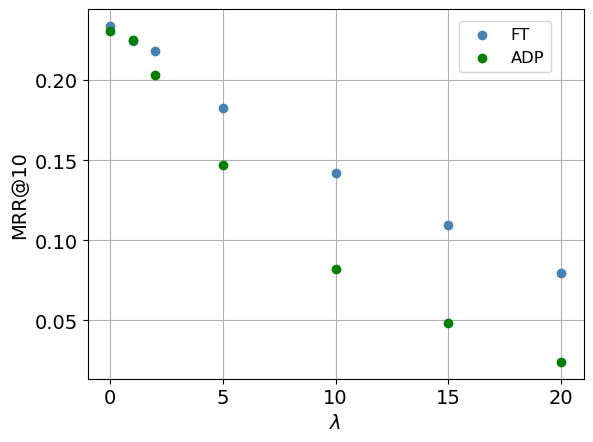

In [58]:
#define colors to use

col_iall = 'steelblue'
col_ilast = 'green'
colcongater = 'red'
col2 = 'black'
col3 = 'black'

#define subplots
fig,ax = plt.subplots()
#ax.set_ylim([0, 0.3])
#add first line to plot


ax.scatter(df_ft_summary['bias_regul_coeff'], df_ft_summary[f'{IRmetric}Mean'], color=col_iall, marker = "o")#, mfc=col2, mec=col2)

ax.scatter(df_adapter_summary["bias_regul_coeff"], df_adapter_summary[f'{IRmetric}Mean'], color=col_ilast, marker = "o") #, mfc=col2, mec=col2)

# ax.scatter(df_adapter_summary["NFairrMean"], df_adapter_summary['MRRMean'], color=col4, marker = "o")
# ax2 = ax.twinx()
# ax2.plot(df_ft_summary['bias_regul_coeff'], df_ft_summary['NFairrMean'], color=col_iall, marker = "v") #, mfc=col3, mec=col3)#
# ax2.plot(df_adapter_summary["bias_regul_coeff"], df_adapter_summary['NFairrMean'], color=col_ilast, marker = "v") #, mfc=col3, mec=col3)
#add x-axis label
ax.set_xlabel('$\lambda$', fontsize=14)
#add y-axis label
ax.set_ylabel(f'{IRmetric}@10')
#add y-axis label
#ax2.set_ylabel('NFaiRR@10 '+'(indicated by $\u25BF$)')
ax.set_axisbelow(True)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.grid(axis='both')

ax.legend(["FT", "ADP"], loc = 'best', fontsize = 'small',bbox_to_anchor=(0.95, 0.99),handler_map={plt.Line2D:HandlerLine2D(update_func=update_prop)})

plt.savefig(f"/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/Results/FT_ADP_{IRmetric}.pdf", format="pdf", bbox_inches="tight")

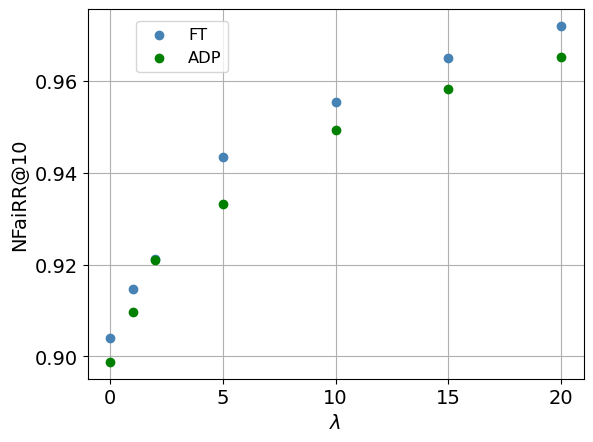

In [61]:
#define colors to use

col_iall = 'steelblue'
col_ilast = 'green'
colcongater = 'red'
col2 = 'black'
col3 = 'black'

#define subplots
fig,ax = plt.subplots()
#ax.set_ylim([0, 0.3])
#add first line to plot


# ax.scatter(df_adapter_summary["NFairrMean"], df_adapter_summary['MRRMean'], color=col4, marker = "o")
ax.scatter(df_ft_summary['bias_regul_coeff'], df_ft_summary['NFairrMean'], color=col_iall, marker = "o") #, mfc=col3, mec=col3)#
ax.scatter(df_adapter_summary["bias_regul_coeff"], df_adapter_summary['NFairrMean'], color=col_ilast, marker = "o") #, mfc=col3, mec=col3)
#add x-axis label
ax.set_xlabel('$\lambda$', fontsize=14)
#add y-axis label
ax.set_ylabel(f'NFaiRR@10')
#add y-axis label
#ax2.set_ylabel('NFaiRR@10 '+'(indicated by $\u25BF$)')
ax.set_axisbelow(True)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(0.02))
ax.grid(axis='both')

ax.legend(["FT", "ADP"], loc = 'best', fontsize = 'small',bbox_to_anchor=(0.3, 0.99),handler_map={plt.Line2D:HandlerLine2D(update_func=update_prop)})

plt.savefig(f"/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/Results/FT_ADP_NFaiRR@10.pdf", format="pdf", bbox_inches="tight")

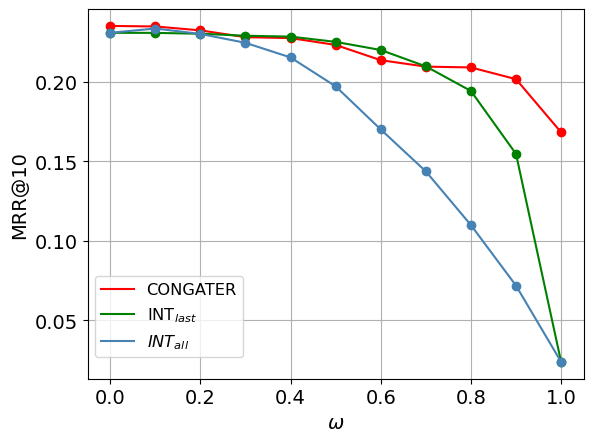

In [59]:
#define colors to use

col_iall = 'steelblue'
col_ilast = 'green'
colcongater = 'red'
col2 = 'black'
col3 = 'black'

dfinterpolatelast = dfinterpolation_summary[(dfinterpolation_summary['interpolate_position'] == 'last') & (~dfinterpolation_summary['w'].isin([0.93,0.95,0.97]))].sort_values("w")
dfinterpolateall = dfinterpolation_summary[(dfinterpolation_summary['interpolate_position'] == 'all') & (~dfinterpolation_summary['w'].isin([0.93,0.95,0.97]))].sort_values("w")
#define subplots
fig,ax = plt.subplots()
#ax.set_ylim([0, 0.3])
#add first line to plot
ax.plot(dfcongater_summary['w'], dfcongater_summary[f'{IRmetric}Mean'], color=colcongater, marker = "o")#, mfc=col2, mec=col2)

ax.plot(dfinterpolatelast["w"], dfinterpolatelast[f'{IRmetric}Mean'], color=col_ilast, marker = "o") #, mfc=col2, mec=col2)

ax.plot(dfinterpolateall["w"], dfinterpolateall[f'{IRmetric}Mean'], color=col_iall, marker = "o") #, mfc=col2, mec=col2)

#add x-axis label
ax.set_xlabel('$\omega$', fontsize=14)
#add y-axis label
ax.set_ylabel(f'{IRmetric}@10')
#add y-axis label
ax.set_axisbelow(True)
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.grid(axis='both')

ax.legend(["CONGATER", "INT$_{last}$", "$INT_{all}$"], loc = 'best', fontsize = 'small',bbox_to_anchor=(0.33, 0.3),handler_map={plt.Line2D:HandlerLine2D(update_func=update_prop)})

plt.savefig(f"/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/Results/CONGATER_INT_{IRmetric}.pdf", format="pdf", bbox_inches="tight")

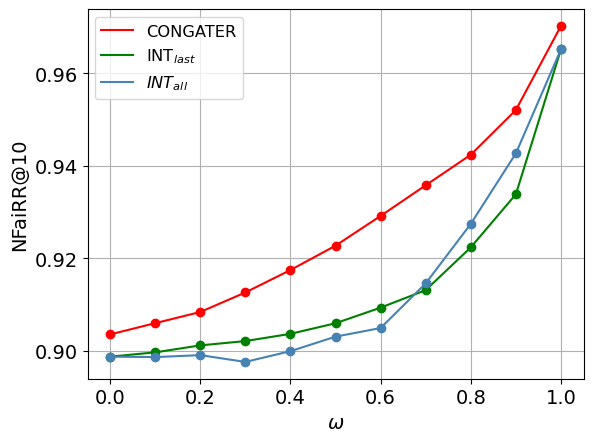

In [153]:
#define colors to use

col_iall = 'steelblue'
col_ilast = 'green'
colcongater = 'red'
col2 = 'black'
col3 = 'black'

dfinterpolatelast = dfinterpolation_summary[(dfinterpolation_summary['interpolate_position'] == 'last') & (~dfinterpolation_summary['w'].isin([0.93,0.95,0.97]))].sort_values("w")
dfinterpolateall = dfinterpolation_summary[(dfinterpolation_summary['interpolate_position'] == 'all') & (~dfinterpolation_summary['w'].isin([0.93,0.95,0.97]))].sort_values("w")
#define subplots
fig,ax = plt.subplots()
#ax.set_ylim([0, 0.3])
#add first line to plot
ax.plot(dfcongater_summary['w'], dfcongater_summary['NFairrMean'], color=colcongater, marker = "o")#, mfc=col2, mec=col2)

ax.plot(dfinterpolatelast["w"], dfinterpolatelast['NFairrMean'], color=col_ilast, marker = "o") #, mfc=col2, mec=col2)

ax.plot(dfinterpolateall["w"], dfinterpolateall['NFairrMean'], color=col_iall, marker = "o") #, mfc=col2, mec=col2)

#add x-axis label
ax.set_xlabel('$\omega$', fontsize=14)
#add y-axis label
ax.set_ylabel(f'NFaiRR@10')
#add y-axis label
ax.set_axisbelow(True)
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(0.02))
ax.grid(axis='both')

ax.legend(["CONGATER", "INT$_{last}$", "$INT_{all}$"], loc = 'best', fontsize = 'small',bbox_to_anchor=(0.33, 1),handler_map={plt.Line2D:HandlerLine2D(update_func=update_prop)})

plt.savefig(f"/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/Results/CONGATER_INT_NFairr.pdf", format="pdf", bbox_inches="tight")

In [41]:
# #define colors to use
# col1 = 'Blues'
# col2 = 'Reds'
# col3 = 'Greens'
# col4 = 'Purples'

# # dfinterpolatelast = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'last'].sort_values("w")
# # dfinterpolateall = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'all'].sort_values("w")

# #define subplots
# fig,ax = plt.subplots()
# #ax2 = ax.twiny()
# #add first line to plot
# # ax.scatter(dfinterpolatelast["NFairrMean"], dfinterpolatelast['MRRMean'],c=dfinterpolatelast['w'], cmap=col1, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')

# # ax.scatter(dfinterpolateall["NFairrMean"], dfinterpolateall['MRRMean'],c=dfinterpolateall['w'], cmap=col2, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')

# #ax.plot(dfcongater_summary["NFairrMean"], dfcongater_summary['MRRMean'], marker = "o",markersize=8) #, edgecolors='grey')

# ax.scatter(df_adapter_summary["NFairrMean"], df_adapter_summary['MRRMean'],c=df_adapter_summary['bias_regul_coeff'], cmap=col1, marker = "o",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')

# ax.scatter(df_ft_summary["NFairrMean"], df_ft_summary['MRRMean'],c=df_ft_summary['bias_regul_coeff'], cmap=col3, marker = "o",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')


# ax.set_ylim(ymin=0)
# ax.yaxis.set_ticks(np.arange(0, 0.24+0.01, 0.02))
# #add x-axis label
# ax.set_xlabel('NFaiRR@10')
# #add y-axis label
# ax.set_ylabel('MRR@10')
# ax.grid(axis='x')

# ax.legend(['ADP','FT'], loc = 'best')

# plt.savefig("/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/Results/mrrvsnfairr_adpFT.pdf", format="pdf", bbox_inches="tight")

In [42]:
# #define colors to use
# col1 = 'Blues'
# col2 = 'Reds'
# col3 = 'Greens'
# col4 = 'Purples'

# # dfinterpolatelast = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'last'].sort_values("w")
# # dfinterpolateall = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'all'].sort_values("w")

# #define subplots
# fig,ax = plt.subplots()
# #ax2 = ax.twiny()
# #add first line to plot
# # ax.scatter(dfinterpolatelast["NFairrMean"], dfinterpolatelast['MRRMean'],c=dfinterpolatelast['w'], cmap=col1, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')

# # ax.scatter(dfinterpolateall["NFairrMean"], dfinterpolateall['MRRMean'],c=dfinterpolateall['w'], cmap=col2, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')

# #ax.plot(dfcongater_summary["NFairrMean"], dfcongater_summary['MRRMean'], marker = "o",markersize=8) #, edgecolors='grey')

# ax.scatter(df_adapter_summary["NFairrMean"], df_adapter_summary['MRRMean'],c=df_adapter_summary['bias_regul_coeff'], cmap=col1, marker = "v",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')
# coef = df_lm[df_lm['Model']=='df_adapter_summary'].iloc[:,df_lm.columns.get_loc("coef")].item()
# intercept = df_lm[df_lm['Model']=='df_adapter_summary'].iloc[:,df_lm.columns.get_loc("intercept")].item()
# ax.plot(df_adapter_summary['NFairrMean'], df_adapter_summary['NFairrMean'].to_numpy()*coef+intercept)


# ax.scatter(df_ft_summary["NFairrMean"], df_ft_summary['MRRMean'],c=df_ft_summary['bias_regul_coeff'], cmap=col3, marker = "x",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')
# coef = df_lm[df_lm['Model']=='df_ft_summary'].iloc[:,df_lm.columns.get_loc("coef")].item()
# intercept = df_lm[df_lm['Model']=='df_ft_summary'].iloc[:,df_lm.columns.get_loc("intercept")].item()
# ax.plot(df_ft_summary['NFairrMean'], df_ft_summary['NFairrMean'].to_numpy()*coef+intercept, color="green")

# ax.set_ylim(ymin=0)
# ax.yaxis.set_ticks(np.arange(0, 0.24+0.01, 0.02))
# #add x-axis label
# ax.set_xlabel('NFaiRR@10')
# #add y-axis label
# ax.set_ylabel('MRR@10')
# ax.grid(axis='x')

# ax.legend(['ADP','FT'], loc = 'best')

# #plt.savefig("/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/Results/mrrvsnfairr_adpFT.pdf", format="pdf", bbox_inches="tight")

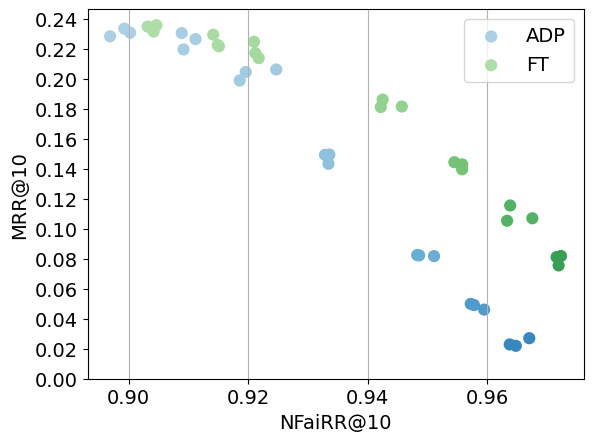

In [43]:
#define colors to use
col1 = 'Blues'
col2 = 'Reds'
col3 = 'Greens'
col4 = 'Purples'

# dfinterpolatelast = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'last'].sort_values("w")
# dfinterpolateall = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'all'].sort_values("w")

#define subplots
fig,ax = plt.subplots()
#ax2 = ax.twiny()
#add first line to plot
# ax.scatter(dfinterpolatelast["NFairrMean"], dfinterpolatelast['MRRMean'],c=dfinterpolatelast['w'], cmap=col1, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')

# ax.scatter(dfinterpolateall["NFairrMean"], dfinterpolateall['MRRMean'],c=dfinterpolateall['w'], cmap=col2, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')

#ax.plot(dfcongater_summary["NFairrMean"], dfcongater_summary['MRRMean'], marker = "o",markersize=8) #, edgecolors='grey')

ax.scatter(df_adapter["Best NFaiRR_cutoff_10"], df_adapter['Best MRR@10'],c=df_adapter['bias_regul_coeff'], cmap=col1, marker = "o",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')

ax.scatter(df_FT["Best NFaiRR_cutoff_10"], df_FT['Best MRR@10'],c=df_FT['bias_regul_coeff'], cmap=col3, marker = "o",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')


ax.set_ylim(ymin=0)
ax.yaxis.set_ticks(np.arange(0, 0.24+0.01, 0.02))
#add x-axis label
ax.set_xlabel('NFaiRR@10')
#add y-axis label
ax.set_ylabel('MRR@10')
ax.grid(axis='x')

ax.legend(['ADP','FT'], loc = 'best')

plt.savefig("/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/Results/mrrvsnfairr_adpFT.pdf", format="pdf", bbox_inches="tight")

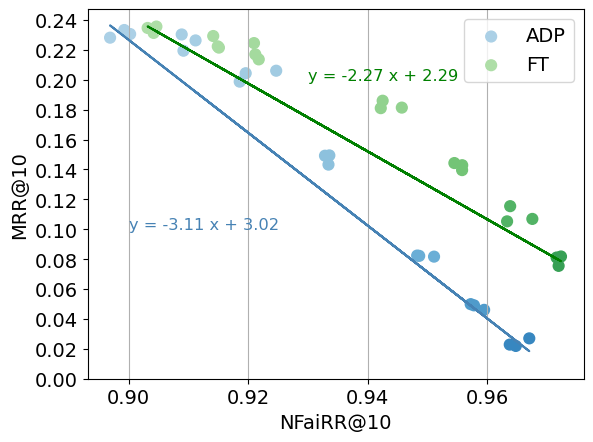

In [86]:
#define colors to use
col1 = 'Blues'
col2 = 'Reds'
col3 = 'Greens'
col4 = 'Purples'

# dfinterpolatelast = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'last'].sort_values("w")
# dfinterpolateall = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'all'].sort_values("w")

#define subplots
fig,ax = plt.subplots()
#ax2 = ax.twiny()
#add first line to plot
# ax.scatter(dfinterpolatelast["NFairrMean"], dfinterpolatelast['MRRMean'],c=dfinterpolatelast['w'], cmap=col1, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')

# ax.scatter(dfinterpolateall["NFairrMean"], dfinterpolateall['MRRMean'],c=dfinterpolateall['w'], cmap=col2, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')

#ax.plot(dfcongater_summary["NFairrMean"], dfcongater_summary['MRRMean'], marker = "o",markersize=8) #, edgecolors='grey')

ax.scatter(df_adapter["Best NFaiRR_cutoff_10"], df_adapter['Best MRR@10'],c=df_adapter['bias_regul_coeff'], cmap=col1, marker = "o",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')
coef = df_lm[df_lm['Model']=='df_adapter'].iloc[:,df_lm.columns.get_loc("coef")].item()
intercept = df_lm[df_lm['Model']=='df_adapter'].iloc[:,df_lm.columns.get_loc("intercept")].item()
ax.plot(df_adapter["Best NFaiRR_cutoff_10"], df_adapter["Best NFaiRR_cutoff_10"].to_numpy()*coef+intercept, color = "steelblue", label='_nolegend_')
ax.text(0.9, 0.1, f"y = {round(coef,2)} x + {round(intercept,2)}", color = "steelblue", fontsize="small")

ax.scatter(df_FT["Best NFaiRR_cutoff_10"], df_FT['Best MRR@10'],c=df_FT['bias_regul_coeff'], cmap=col3, marker = "o",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')
coef = df_lm[df_lm['Model']=='df_ft'].iloc[:,df_lm.columns.get_loc("coef")].item()
intercept = df_lm[df_lm['Model']=='df_ft'].iloc[:,df_lm.columns.get_loc("intercept")].item()
ax.plot(df_FT["Best NFaiRR_cutoff_10"], df_FT["Best NFaiRR_cutoff_10"].to_numpy()*coef+intercept, color = "green", label='_nolegend_')
ax.text(0.93, 0.2, f"y = {round(coef,2)} x + {round(intercept,2)}", color = "green", fontsize="small")

ax.set_ylim(ymin=0)
ax.yaxis.set_ticks(np.arange(0, 0.24+0.01, 0.02))
#add x-axis label
ax.set_xlabel('NFaiRR@10')
#add y-axis label
ax.set_ylabel('MRR@10')
ax.grid(axis='x')

ax.legend(['ADP','FT'], loc = 'best')

plt.savefig("/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/Results/mrrvsnfairr_adpFT_reg.pdf", format="pdf", bbox_inches="tight")

In [45]:
# #define colors to use
# col1 = 'Blues'
# col2 = 'Reds'
# col3 = 'Greens'
# col4 = 'Purples'

# dfinterpolatelast = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'last'].sort_values("w")
# dfinterpolateall = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'all'].sort_values("w")

# #define subplots
# fig,ax = plt.subplots()
# #ax2 = ax.twiny()
# #add first line to plot
# ax.scatter(dfcongater_summary["NFairrMean"], dfcongater_summary['MRRMean'],c=dfcongater_summary['w'], cmap=col2, marker = "o",vmin=-1., vmax=2)

# ax.scatter(dfinterpolatelast["NFairrMean"], dfinterpolatelast['MRRMean'],c=dfinterpolatelast['w'], cmap=col1, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')

# ax.scatter(dfinterpolateall["NFairrMean"], dfinterpolateall['MRRMean'],c=dfinterpolateall['w'], cmap=col3, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')
# # ax.scatter(df_adapter_summary["NFairrMean"], df_adapter_summary['MRRMean'],c=df_adapter_summary['bias_regul_coeff'], cmap=col2, marker = "v",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')

# # ax.scatter(df_ft_summary["NFairrMean"], df_ft_summary['MRRMean'],c=df_ft_summary['bias_regul_coeff'], cmap=col3, marker = "x",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')

# ax.set_ylim(ymin=0)
# ax.yaxis.set_ticks(np.arange(0, 0.24+0.01, 0.02))
# #add x-axis label
# ax.set_xlabel('NFaiRR@10')
# #add y-axis label
# ax.set_ylabel('MRR@10')
# ax.grid(axis='x')

# ax.legend(["CONGATER", "INT$_{last}$", "INT$_{all}$"], loc = 'best')

#plt.savefig("/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/Results/mrrvsnfairr_congater.pdf", format="pdf", bbox_inches="tight")

In [46]:
# #define colors to use
# col1 = 'Blues'
# col2 = 'Reds'
# col3 = 'Greens'
# col4 = 'Purples'

# dfinterpolatelast = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'last'].sort_values("w")
# dfinterpolateall = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'all'].sort_values("w")

# #define subplots
# fig,ax = plt.subplots()
# #ax2 = ax.twiny()
# #add first line to plot
# ax.scatter(dfcongater_summary["NFairrMean"], dfcongater_summary['MRRMean'],c=dfcongater_summary['w'], cmap=col2, marker = "o",vmin=-1., vmax=2)
# coef = df_lm[df_lm['Model']=='dfcongater_summary'].iloc[:,df_lm.columns.get_loc("coef")].item()
# intercept = df_lm[df_lm['Model']=='dfcongater_summary'].iloc[:,df_lm.columns.get_loc("intercept")].item()
# ax.plot(dfcongater_summary['NFairrMean'], dfcongater_summary['NFairrMean'].to_numpy()*coef+intercept, color = "red")

# ax.scatter(dfinterpolatelast["NFairrMean"], dfinterpolatelast['MRRMean'],c=dfinterpolatelast['w'], cmap=col1, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')
# coef = df_lm[df_lm['Model']=='dfinterpolatelast'].iloc[:,df_lm.columns.get_loc("coef")].item()
# intercept = df_lm[df_lm['Model']=='dfinterpolatelast'].iloc[:,df_lm.columns.get_loc("intercept")].item()
# ax.plot(dfinterpolatelast['NFairrMean'], dfinterpolatelast['NFairrMean'].to_numpy()*coef+intercept, color = "blue")

# ax.scatter(dfinterpolateall["NFairrMean"], dfinterpolateall['MRRMean'],c=dfinterpolateall['w'], cmap=col3, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')
# coef = df_lm[df_lm['Model']=='dfinterpolateall'].iloc[:,df_lm.columns.get_loc("coef")].item()
# intercept = df_lm[df_lm['Model']=='dfinterpolateall'].iloc[:,df_lm.columns.get_loc("intercept")].item()
# ax.plot(dfinterpolateall['NFairrMean'], dfinterpolateall['NFairrMean'].to_numpy()*coef+intercept, color = "green")
# # ax.scatter(df_adapter_summary["NFairrMean"], df_adapter_summary['MRRMean'],c=df_adapter_summary['bias_regul_coeff'], cmap=col2, marker = "v",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')

# # ax.scatter(df_ft_summary["NFairrMean"], df_ft_summary['MRRMean'],c=df_ft_summary['bias_regul_coeff'], cmap=col3, marker = "x",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')

# ax.set_ylim(ymin=0)
# ax.yaxis.set_ticks(np.arange(0, 0.24+0.01, 0.02))
# #add x-axis label
# ax.set_xlabel('NFaiRR@10')
# #add y-axis label
# ax.set_ylabel('MRR@10')
# ax.grid(axis='x')

#ax.legend(["CONGATER", "INT$_{last}$", "INT$_{all}$"], loc = 'best')

#plt.savefig("/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/Results/mrrvsnfairr_congater.pdf", format="pdf", bbox_inches="tight")

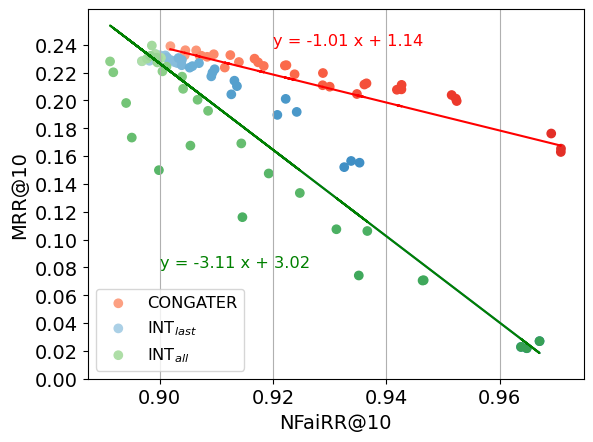

In [88]:
#define colors to use
col1 = 'Blues'
col2 = 'Reds'
col3 = 'Greens'
col4 = 'Purples'

dfinterpolatelast = dfinterpolation[(dfinterpolation['interpolate_position'] == 'last') & (~dfinterpolation['w'].isin([0.93,0.95,0.97]))].sort_values("w")
dfinterpolateall = dfinterpolation[(dfinterpolation['interpolate_position'] == 'all') & (~dfinterpolation['w'].isin([0.93,0.95,0.97]))].sort_values("w")

#define subplots
fig,ax = plt.subplots()
#ax2 = ax.twiny()
#add first line to plot
ax.scatter(dfcongater["Best NFaiRR_cutoff_10"], dfcongater['Best MRR@10'],c=dfcongater['w'], cmap=col2, marker = "o",vmin=-1., vmax=2)
coef = df_lm[df_lm['Model']=='dfcongater'].iloc[:,df_lm.columns.get_loc("coef")].item()
intercept = df_lm[df_lm['Model']=='dfcongater'].iloc[:,df_lm.columns.get_loc("intercept")].item()
ax.plot(dfcongater["Best NFaiRR_cutoff_10"], dfcongater["Best NFaiRR_cutoff_10"].to_numpy()*coef+intercept, color = "red", label='_nolegend_')
ax.text(0.92, 0.24, f"y = {round(coef,2)} x + {round(intercept,2)}", color = "red",fontsize="small")

ax.scatter(dfinterpolatelast["Best NFaiRR_cutoff_10"], dfinterpolatelast['Best MRR@10'],c=dfinterpolatelast['w'], cmap=col1, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')
coef = df_lm[df_lm['Model']=='dfinterpolatelast'].iloc[:,df_lm.columns.get_loc("coef")].item()
intercept = df_lm[df_lm['Model']=='dfinterpolatelast'].iloc[:,df_lm.columns.get_loc("intercept")].item()
ax.plot(dfinterpolatelast["Best NFaiRR_cutoff_10"], dfinterpolatelast["Best NFaiRR_cutoff_10"].to_numpy()*coef+intercept, color = "steelblue", label='_nolegend_')

ax.scatter(dfinterpolateall["Best NFaiRR_cutoff_10"], dfinterpolateall['Best MRR@10'],c=dfinterpolateall['w'], cmap=col3, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')
coef = df_lm[df_lm['Model']=='dfinterpolateall'].iloc[:,df_lm.columns.get_loc("coef")].item()
intercept = df_lm[df_lm['Model']=='dfinterpolateall'].iloc[:,df_lm.columns.get_loc("intercept")].item()
ax.plot(dfinterpolateall["Best NFaiRR_cutoff_10"], dfinterpolateall["Best NFaiRR_cutoff_10"].to_numpy()*coef+intercept, color = "green", label='_nolegend_')
ax.text(0.9, 0.08, f"y = {round(coef,2)} x + {round(intercept,2)}", color = "green",fontsize="small")
# ax.scatter(df_adapter_summary["NFairrMean"], df_adapter_summary['MRRMean'],c=df_adapter_summary['bias_regul_coeff'], cmap=col2, marker = "v",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')

# ax.scatter(df_ft_summary["NFairrMean"], df_ft_summary['MRRMean'],c=df_ft_summary['bias_regul_coeff'], cmap=col3, marker = "x",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')

ax.set_ylim(ymin=0)
ax.yaxis.set_ticks(np.arange(0, 0.24+0.01, 0.02))
#add x-axis label
ax.set_xlabel('NFaiRR@10')
#add y-axis label
ax.set_ylabel('MRR@10')
ax.grid(axis='x')

ax.legend(["CONGATER", "INT$_{last}$", "INT$_{all}$"], loc = 'best', fontsize="small")

plt.savefig("/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/Results/mrrvsnfairr_congater_reg.pdf", format="pdf", bbox_inches="tight")

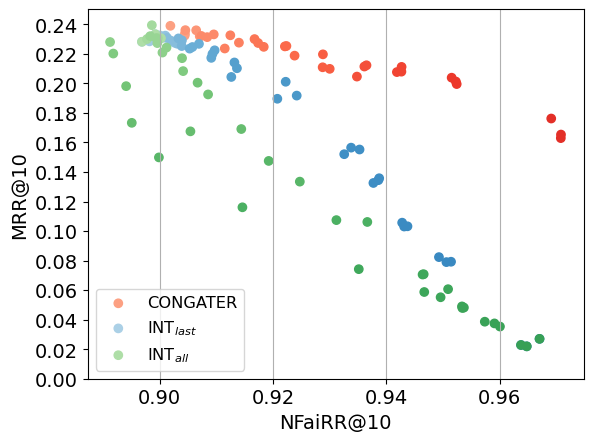

In [48]:
#define colors to use
col1 = 'Blues'
col2 = 'Reds'
col3 = 'Greens'
col4 = 'Purples'

dfinterpolatelast = dfinterpolation[dfinterpolation['interpolate_position'] == 'last'].sort_values("w")
dfinterpolateall = dfinterpolation[dfinterpolation['interpolate_position'] == 'all'].sort_values("w")

#define subplots
fig,ax = plt.subplots()
#ax2 = ax.twiny()
#add first line to plot
ax.scatter(dfcongater["Best NFaiRR_cutoff_10"], dfcongater['Best MRR@10'],c=dfcongater['w'], cmap=col2, marker = "o",vmin=-1., vmax=2)

ax.scatter(dfinterpolatelast["Best NFaiRR_cutoff_10"], dfinterpolatelast['Best MRR@10'],c=dfinterpolatelast['w'], cmap=col1, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')

ax.scatter(dfinterpolateall["Best NFaiRR_cutoff_10"], dfinterpolateall['Best MRR@10'],c=dfinterpolateall['w'], cmap=col3, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')
# ax.scatter(df_adapter_summary["NFairrMean"], df_adapter_summary['MRRMean'],c=df_adapter_summary['bias_regul_coeff'], cmap=col2, marker = "v",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')

# ax.scatter(df_ft_summary["NFairrMean"], df_ft_summary['MRRMean'],c=df_ft_summary['bias_regul_coeff'], cmap=col3, marker = "x",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')

ax.set_ylim(ymin=0)
ax.yaxis.set_ticks(np.arange(0, 0.24+0.01, 0.02))
#add x-axis label
ax.set_xlabel('NFaiRR@10')
#add y-axis label
ax.set_ylabel('MRR@10')
ax.grid(axis='x')

ax.legend(["CONGATER", "INT$_{last}$", "INT$_{all}$"], loc = 'best', fontsize="small")

plt.savefig("/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/Results/mrrvsnfairr_congater.pdf", format="pdf", bbox_inches="tight")

In [49]:
# #define colors to use
# col1 = 'steelblue'
# col2 = 'red'
# col3 = 'green'
# col4 = 'orange'

# dfexperiment1 = dfinterpolation[dfinterpolation[config_par] == 'last'].sort_values("w")
# dfexperiment2 = dfinterpolation[dfinterpolation[config_par] == 'all'].sort_values("w")
# #define subplots
# fig,ax = plt.subplots()
# #add first line to plot
# ax.scatter(dfexperiment1["Best NFaiRR_cutoff_10"], dfexperiment1['Best MRR@10'], color=col1, marker = "o")

# ax.scatter(dfexperiment2["Best NFaiRR_cutoff_10"], dfexperiment2['Best MRR@10'], color=col2, marker = "o")

# ax.scatter(dfcongater["Best NFaiRR_cutoff_10"], dfcongater['Best MRR@10'], color=col3, marker = "o")

# ax.scatter(df_adapter["Best NFaiRR_cutoff_10"], df_adapter['Best MRR@10'], color=col4, marker = "o")
# #add x-axis label
# ax.set_xlabel('NFaiRR@10', fontsize=14)
# #add y-axis label
# ax.set_ylabel('MRR@10', fontsize=16)

# ax.legend([dfexperiment1[config_par].iloc[0], dfexperiment2[config_par].iloc[0], 'dfcongater','adapter'])

### Paper plots

In [66]:
fnt_size = 14
plt.rc('font', size=fnt_size)          # controls default text sizes
plt.rc('axes', titlesize=fnt_size)     # fontsize of the axes title
plt.rc('axes', labelsize=fnt_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fnt_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fnt_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=fnt_size)    # legend fontsize
plt.rc('figure', titlesize=fnt_size)  # fontsize of the figure title

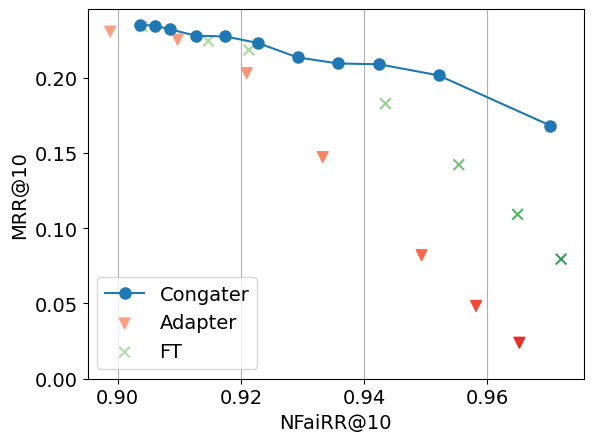

In [71]:
#define colors to use
col1 = 'Blues'
col2 = 'Reds'
col3 = 'Greens'
col4 = 'Purples'
col5 = 'Greys'

dfinterpolatelast = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'last'].sort_values("w")
dfinterpolateall = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'all'].sort_values("w")

#define subplots
fig,ax = plt.subplots()
#ax2 = ax.twiny()
#add first line to plot
#ax.scatter(dfinterpolatelast["NFairrMean"], dfinterpolatelast['MRRMean'],c=dfinterpolatelast['w'], cmap=col4, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')

#ax.scatter(dfinterpolateall["NFairrMean"], dfinterpolateall['MRRMean'],c=dfinterpolateall['w'], cmap=col5, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')

ax.plot(dfcongater_summary["NFairrMean"], dfcongater_summary[f'{IRmetric}Mean'], marker = "o",markersize=8) #, edgecolors='grey')

ax.scatter(df_adapter_summary["NFairrMean"], df_adapter_summary[f'{IRmetric}Mean'],c=df_adapter_summary['bias_regul_coeff'], cmap=col2, marker = "v",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')

ax.scatter(df_ft_summary["NFairrMean"], df_ft_summary[f'{IRmetric}Mean'],c=df_ft_summary['bias_regul_coeff'], cmap=col3, marker = "x",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')

#ax.scatter(dfinterpolatelast["NFairrMean"], dfinterpolatelast['MRRMean'],c=dfinterpolatelast['bias_regul_coeff'], cmap=col4, marker = "x",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')

ax.set_ylim(ymin=0)
#ax.yaxis.set_ticks(np.arange(0, 0.24+0.01, 0.02))
#add x-axis label
ax.set_xlabel('NFaiRR@10')
#add y-axis label
ax.set_ylabel(f'{IRmetric}@10')
ax.grid(axis='x')

ax.legend(['Congater','Adapter','FT'], loc = 'best')

#plt.savefig("/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/Results/EACL_IR_result_mrrvsnfairr.pdf", format="pdf", bbox_inches="tight")

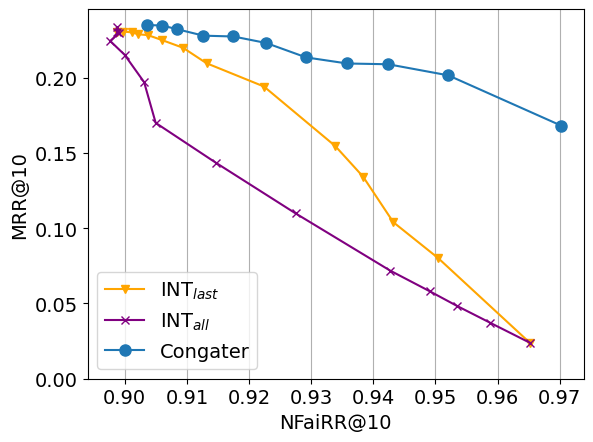

In [75]:
col1 = 'Blues'
col2 = 'Reds'
col3 = 'Greens'
col4 = 'Purples'
col5 = 'Oranges'

dfinterpolatelast = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'last'].sort_values("w")
dfinterpolateall = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'all'].sort_values("w")

#define subplots
fig,ax = plt.subplots()
#ax2 = ax.twiny()
#add first line to plot
ax.plot(dfinterpolatelast["NFairrMean"], dfinterpolatelast[f'{IRmetric}Mean'],c="orange", marker = "v")#,vmin=-1., vmax=2) #, edgecolors='grey')

ax.plot(dfinterpolateall["NFairrMean"], dfinterpolateall[f'{IRmetric}Mean'],c="purple", marker = "x")#,vmin=-1., vmax=2) #, edgecolors='grey')

ax.plot(dfcongater_summary["NFairrMean"], dfcongater_summary[f'{IRmetric}Mean'], marker = "o",markersize=8) #, edgecolors='grey')



#ax.scatter(dfinterpolatelast["NFairrMean"], dfinterpolatelast['MRRMean'],c=dfinterpolatelast['bias_regul_coeff'], cmap=col4, marker = "x",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')

ax.set_ylim(ymin=0)
#ax.yaxis.set_ticks(np.arange(0, 0.24+0.01, 0.02))
#add x-axis label
ax.set_xlabel('NFaiRR@10')
#add y-axis label
ax.set_ylabel(f'{IRmetric}@10')
ax.grid(axis='x')

ax.legend(["INT$_{last}$", "INT$_{all}$",'Congater'], loc = 'best')
plt.savefig(f"/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/Results/EACL_IR_result_mrrvsnfairr_{IRmetric}_2.png", format="png", bbox_inches="tight")

In [43]:
# #define colors to use
# col1 = 'Blues'
# col2 = 'Reds'
# col3 = 'Greens'
# col4 = 'Purples'

# # dfinterpolatelast = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'last'].sort_values("w")
# dfinterpolateall = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'all'].sort_values("w")

# #define subplots
# fig,ax = plt.subplots()
# #ax2 = ax.twiny()
# #add first line to plot
# # ax.scatter(dfinterpolatelast["NFairrMean"], dfinterpolatelast['MRRMean'],c=dfinterpolatelast['w'], cmap=col1, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')

# # ax.scatter(dfinterpolateall["NFairrMean"], dfinterpolateall['MRRMean'],c=dfinterpolateall['w'], cmap=col2, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')

# ax.plot(dfcongater_summary["NFairrMean"], dfcongater_summary['MRRMean'], marker = "o",markersize=8) #, edgecolors='grey')

# ax.scatter(dfinterpolateall["NFairrMean"], dfinterpolateall['MRRMean'],c=dfinterpolateall['w'], cmap=col2, marker = "v",vmin=-1., vmax=2,s= 60) #, edgecolors='grey')

# ax.set_ylim(ymin=0)
# ax.yaxis.set_ticks(np.arange(0, 0.24+0.01, 0.02))
# #add x-axis label
# ax.set_xlabel('NFaiRR@10')
# #add y-axis label
# ax.set_ylabel('MRR@10')
# ax.grid(axis='x')

# ax.legend(['Congater','interpolate all'], loc = 'best')

# plt.savefig("/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/Results/mrrvsnfairr_interpolate.pdf", format="pdf", bbox_inches="tight")

## Regression results v1

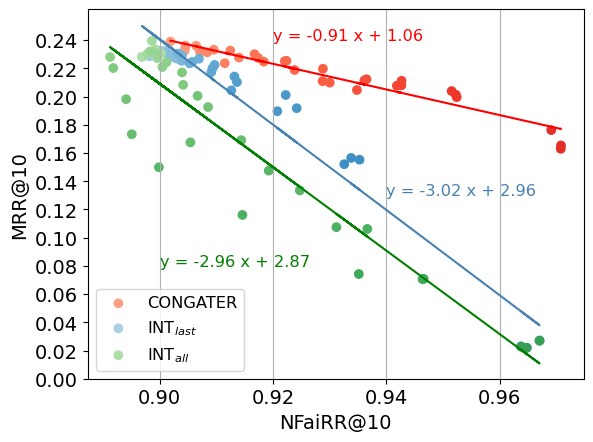

In [82]:
#define colors to use
col1 = 'Blues'
col2 = 'Reds'
col3 = 'Greens'
col4 = 'Purples'

dfinterpolatelast = dfinterpolation[(dfinterpolation['interpolate_position'] == 'last') & (~dfinterpolation['w'].isin([0.93,0.95,0.97]))].sort_values("w")
dfinterpolateall = dfinterpolation[(dfinterpolation['interpolate_position'] == 'all') & (~dfinterpolation['w'].isin([0.93,0.95,0.97]))].sort_values("w")

#define subplots
fig,ax = plt.subplots()
#ax2 = ax.twiny()
#add first line to plot
ax.scatter(dfcongater["Best NFaiRR_cutoff_10"], dfcongater['Best MRR@10'],c=dfcongater['w'], cmap=col2, marker = "o",vmin=-1., vmax=2)
coef = df_lm_v1[df_lm_v1['Model']=='dfcongater'].iloc[:,df_lm_v1.columns.get_loc("coef")].item()
intercept = df_lm_v1[df_lm_v1['Model']=='dfcongater'].iloc[:,df_lm_v1.columns.get_loc("intercept")].item()
ax.plot(dfcongater["Best NFaiRR_cutoff_10"], dfcongater["Best NFaiRR_cutoff_10"].to_numpy()*coef+intercept, color = "red", label='_nolegend_')
ax.text(0.92, 0.24, f"y = {round(coef,2)} x + {round(intercept,2)}", color = "red",fontsize="small")


ax.scatter(dfinterpolatelast["Best NFaiRR_cutoff_10"], dfinterpolatelast['Best MRR@10'],c=dfinterpolatelast['w'], cmap=col1, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')
coef = df_lm_v1[df_lm_v1['Model']=='dfinterpolatelast'].iloc[:,df_lm_v1.columns.get_loc("coef")].item()
intercept = df_lm_v1[df_lm_v1['Model']=='dfinterpolatelast'].iloc[:,df_lm_v1.columns.get_loc("intercept")].item()
ax.plot(dfinterpolatelast["Best NFaiRR_cutoff_10"], dfinterpolatelast["Best NFaiRR_cutoff_10"].to_numpy()*coef+intercept, color = "steelblue", label='_nolegend_')
ax.text(0.94, 0.13, f"y = {round(coef,2)} x + {round(intercept,2)}", color = "steelblue",fontsize="small")

ax.scatter(dfinterpolateall["Best NFaiRR_cutoff_10"], dfinterpolateall['Best MRR@10'],c=dfinterpolateall['w'], cmap=col3, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')
coef = df_lm_v1[df_lm_v1['Model']=='dfinterpolateall'].iloc[:,df_lm_v1.columns.get_loc("coef")].item()
intercept = df_lm_v1[df_lm_v1['Model']=='dfinterpolateall'].iloc[:,df_lm_v1.columns.get_loc("intercept")].item()
ax.plot(dfinterpolateall["Best NFaiRR_cutoff_10"], dfinterpolateall["Best NFaiRR_cutoff_10"].to_numpy()*coef+intercept, color = "green", label='_nolegend_')
ax.text(0.9, 0.08, f"y = {round(coef,2)} x + {round(intercept,2)}", color = "green",fontsize="small")
# ax.scatter(df_adapter_summary["NFairrMean"], df_adapter_summary['MRRMean'],c=df_adapter_summary['bias_regul_coeff'], cmap=col2, marker = "v",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')

# ax.scatter(df_ft_summary["NFairrMean"], df_ft_summary['MRRMean'],c=df_ft_summary['bias_regul_coeff'], cmap=col3, marker = "x",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')

ax.set_ylim(ymin=0)
ax.yaxis.set_ticks(np.arange(0, 0.24+0.01, 0.02))
#add x-axis label
ax.set_xlabel('NFaiRR@10')
#add y-axis label
ax.set_ylabel('MRR@10')
ax.grid(axis='x')

ax.legend(["CONGATER", "INT$_{last}$", "INT$_{all}$"], loc = 'best', fontsize="small")

plt.savefig("/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/Results/mrrvsnfairr_congater_regv1.pdf", format="pdf", bbox_inches="tight")

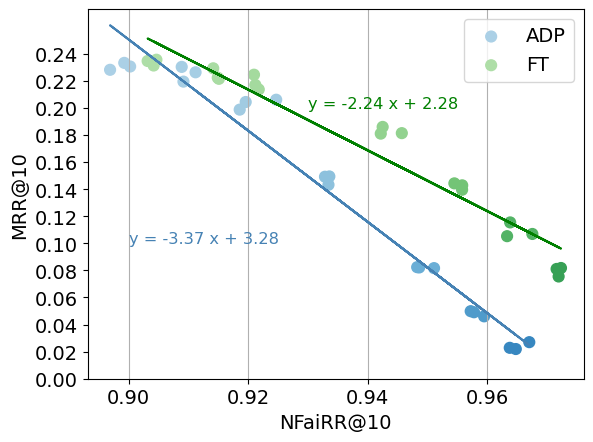

In [60]:
#define colors to use
col1 = 'Blues'
col2 = 'Reds'
col3 = 'Greens'
col4 = 'Purples'

# dfinterpolatelast = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'last'].sort_values("w")
# dfinterpolateall = dfinterpolation_summary[dfinterpolation_summary['interpolate_position'] == 'all'].sort_values("w")

#define subplots
fig,ax = plt.subplots()
#ax2 = ax.twiny()
#add first line to plot
# ax.scatter(dfinterpolatelast["NFairrMean"], dfinterpolatelast['MRRMean'],c=dfinterpolatelast['w'], cmap=col1, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')

# ax.scatter(dfinterpolateall["NFairrMean"], dfinterpolateall['MRRMean'],c=dfinterpolateall['w'], cmap=col2, marker = "o",vmin=-1., vmax=2) #, edgecolors='grey')

#ax.plot(dfcongater_summary["NFairrMean"], dfcongater_summary['MRRMean'], marker = "o",markersize=8) #, edgecolors='grey')

ax.scatter(df_adapter["Best NFaiRR_cutoff_10"], df_adapter['Best MRR@10'],c=df_adapter['bias_regul_coeff'], cmap=col1, marker = "o",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')
coef = df_lm_v1[df_lm_v1['Model']=='df_adapter'].iloc[:,df_lm_v1.columns.get_loc("coef")].item()
intercept = df_lm_v1[df_lm_v1['Model']=='df_adapter'].iloc[:,df_lm_v1.columns.get_loc("intercept")].item()
ax.plot(df_adapter["Best NFaiRR_cutoff_10"], df_adapter["Best NFaiRR_cutoff_10"].to_numpy()*coef+intercept, color = "steelblue", label='_nolegend_')
ax.text(0.9, 0.1, f"y = {round(coef,2)} x + {round(intercept,2)}", color = "steelblue", fontsize="small")

ax.scatter(df_FT["Best NFaiRR_cutoff_10"], df_FT['Best MRR@10'],c=df_FT['bias_regul_coeff'], cmap=col3, marker = "o",vmin=-20., vmax=40,s= 60) #, edgecolors='grey')
coef = df_lm_v1[df_lm_v1['Model']=='df_ft'].iloc[:,df_lm_v1.columns.get_loc("coef")].item()
intercept = df_lm_v1[df_lm_v1['Model']=='df_ft'].iloc[:,df_lm_v1.columns.get_loc("intercept")].item()
ax.plot(df_FT["Best NFaiRR_cutoff_10"], df_FT["Best NFaiRR_cutoff_10"].to_numpy()*coef+intercept, color = "green", label='_nolegend_')
ax.text(0.93, 0.2, f"y = {round(coef,2)} x + {round(intercept,2)}", color = "green", fontsize="small")

ax.set_ylim(ymin=0)
ax.yaxis.set_ticks(np.arange(0, 0.24+0.01, 0.02))
#add x-axis label
ax.set_xlabel('NFaiRR@10')
#add y-axis label
ax.set_ylabel('MRR@10')
ax.grid(axis='x')

ax.legend(['ADP','FT'], loc = 'best')

plt.savefig("/mnt/c/Users/Cornelia/Documents/AI/MasterThesis/Results/mrrvsnfairr_adpFT_regv1.pdf", format="pdf", bbox_inches="tight")